In [2]:
import pandas as pd
import numpy as np
import io
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(url)[12]


In [3]:
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [4]:
print(df.shape)

(28, 9)


In [5]:
df.replace({"—": np.nan}, inplace=True)

In [6]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [7]:
nan_columns = df.columns[df.isnull().any()].tolist()
df[nan_columns] = df[nan_columns].astype(float)
df.dtypes
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [8]:
missing_percentage_per_column = (df.isnull().sum() / len(df)) * 100

print("Частка пропусків в кожній колонці, %:")
print(missing_percentage_per_column)

Частка пропусків в кожній колонці, %:
Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


In [9]:
df.drop(df.tail(1).index, inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

In [10]:
numeric_columns = df.columns[df.dtypes != object]
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
print(df)

               Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська  262.00  235.000000  144.0   116    62    

In [11]:
regions_higher_than_avg_2019 = df[df['2019'] > df['2019'].mean()]
print("\nРегіони з вищою народжуваністю у 2019 році:")
print(regions_higher_than_avg_2019['Регіон'])


Регіони з вищою народжуваністю у 2019 році:
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [15]:
region_highest_birth_rate_2014 = df[df['2014'] == df['2014'].max()]
print("\nРегіон з найвищою народжуваністю у 2014 році:")
print(region_highest_birth_rate_2014['Регіон'].values[0])


Регіон з найвищою народжуваністю у 2014 році:
Рівненська


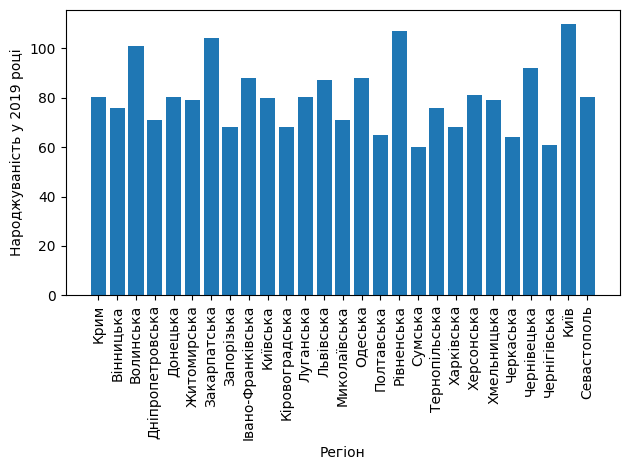

In [13]:
import matplotlib.pyplot as plt

plt.bar(df['Регіон'], df['2019'])
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2019 році')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

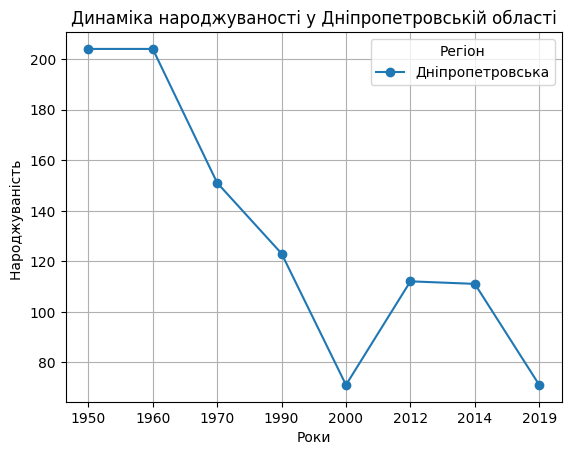

In [35]:
region_data = df[df['Регіон'] == 'Дніпропетровська']
region_data.set_index('Регіон').T.plot(marker='o')
plt.xlabel('Роки')
plt.title('Динаміка народжуваності у Дніпропетровській області')
plt.ylabel('Народжуваність ')
plt.grid(True)
plt.show()

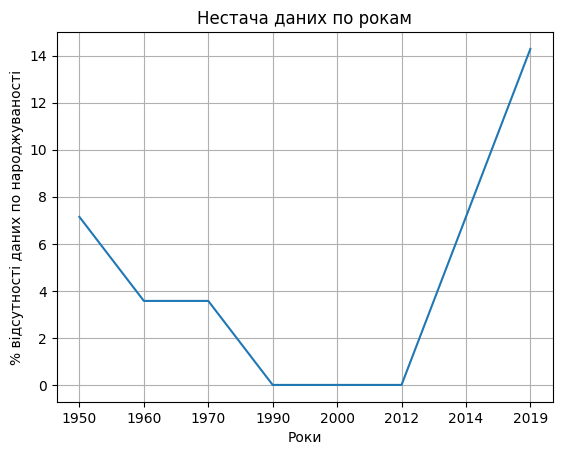

In [47]:
missing_percentage_per_column[1:].plot()
plt.xlabel('Роки')
plt.title('Нестача даних по рокам')
plt.ylabel('% відсутності даних по народжуваності')
plt.grid(True)
plt.show()